In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import f
import statsmodels.tsa.api as smt

<font size="5"><strong />Partie 2. Séries temporelles<strong /><center> <font />

# Question 1

Importer les données du fichier quarterly.xls (corriger le problème éventuel d’observations manquantes)

In [2]:
df = pd.read_excel("./quarterly.xls")
df.head()

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073


In [3]:
df[df.isna().any(axis=1)]

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr


Conclusion: on voit qu'il n'y a pas de manquant dans le dataset. Mais au cas le manquant, on peut le remplacer par la moyenne des 2 valuers voisines.

# Question 2

Stationnariser la série de CPI en utilisant la méthode de régression qui inclue un terme de tendance dont la forme fonctionnelle est à choisir (linéaire, quadratique, log, exponentielle, ...)

In [4]:
# fit CPI avec regression lineare 
x = range(1, df.shape[0]+1)
x = sm.add_constant(x)

model = sm.OLS(df.CPI,x)
results = model.fit()
print(results.summary())

# stationner
x = np.linspace(0,len(df.CPI),len(df.CPI))
o = df.CPI - (results.params[1]*x + results.params[0])

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.203e+04
Date:                Sun, 12 Apr 2020   Prob (F-statistic):          2.37e-187
Time:                        21:24:36   Log-Likelihood:                -755.40
No. Observations:                 212   AIC:                             1515.
Df Residuals:                     210   BIC:                             1522.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7721      1.182      0.653      0.5

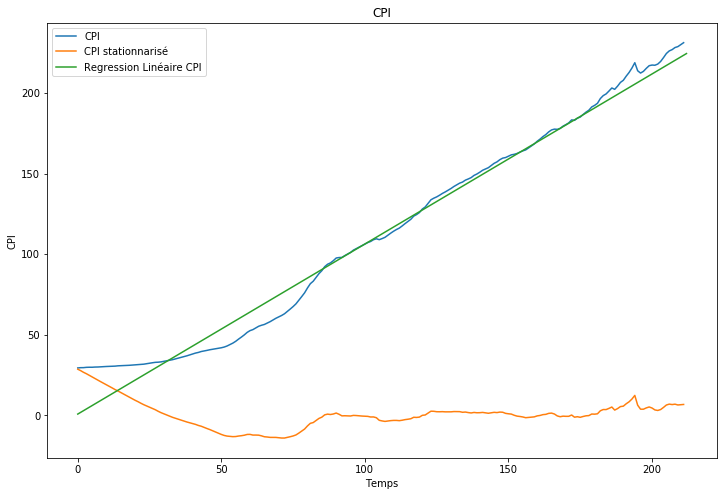

In [5]:
plt.figure(figsize=(12,8))
plt.plot(df.CPI, label='CPI')
plt.plot(o, label = 'CPI stationnarisé')
X_plot = np.linspace(0,len(df.CPI),len(df.CPI))
plt.plot(X_plot, X_plot*results.params[1] + results.params[0], label='Regression Linéaire CPI')
plt.legend()
plt.title("CPI")
plt.xlabel("Temps")
plt.ylabel("CPI")
plt.show()

# Question 3

Stationnariser la série de CPI en utilisant un moyenne mobile centrée 5x5.

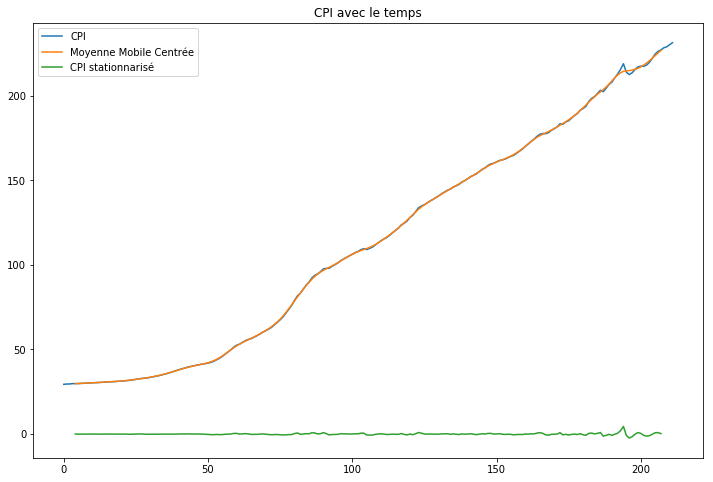

In [6]:
# moyenne mobile centrée 5x5
t5 = (df.CPI.rolling(window=5).mean() + df.CPI.rolling(window=5).mean().shift(-1) + df.CPI.rolling(window=5).mean().shift(-2) + df.CPI.rolling(window=5).mean().shift(-3) +df.CPI.rolling(window=5).mean().shift(-4))/5
o5 = df.CPI[4:208] - t5[4:208]

# plot
plt.figure(figsize=(12,8))
plt.plot(df.CPI, label = "CPI")
plt.plot(t5, label = "Moyenne Mobile Centrée")
plt.plot(o5, label = "CPI stationnarisé")
plt.title("CPI avec le temps")
plt.legend()
plt.show()

La moyenne mobile centrée permet de lisser la courbe.
Le CPI stationnarisé est les petites vibrations de la courbe autour de la moyenne mobile centrée.

# Question 4

Calculer inf, le taux d’inflation à partir de la variable CPI. Faire un graphique dans le temps de inf. Commentez.

In [7]:
# changer la format de date
df.DATE = pd.to_datetime(df.DATE)

In [8]:
# calculer inf
df['inf'] = df.CPI.pct_change()
df = df.dropna()
df.head()

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr,inf
1,1960-04-01,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862,0.005782
2,1960-07-01,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217,0.000676
3,1960-10-01,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624,0.006421
4,1961-01-01,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073,0.002015
5,1961-04-01,1.73,2.30,2.94,3.62,3.79,31.47,33.33,29.83,19.23,141.40,966.4,320.97,7.00,23.00,2869.6,2962.9,18.785,32.131,-0.000335


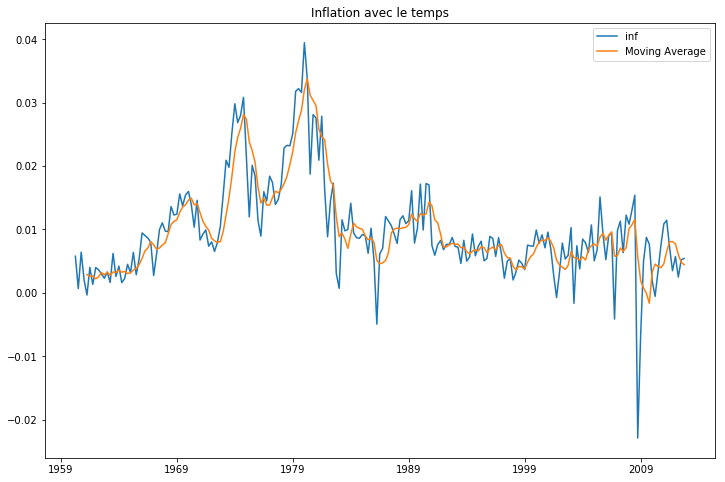

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df.DATE, df.inf, label='inf')
plt.plot(df.DATE, df.inf.rolling(window=5).mean(), label='Moving Average')
plt.title("Inflation avec le temps")
plt.legend()
plt.show()

L'inflation a augmenté depuis 1959 jusqu'en 1981, elle était atteinte à son pic à 1981 avec une valeur de 4%. Puis l'inflation a chuté peu avant les années 1990. On remarque une déflation sur la période de crise financière de 2008. Le régime d'inflation semblait plus instable avant les années 90, puis contrôlé entre 1990 et 2008, avant la crise financière.

# Question 5

Interpréter l'autocorrélogramme et l'autocorrélogrammes partiels de inf. Quelle est la différence entre ces deux graphiques ?

/Users/didi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


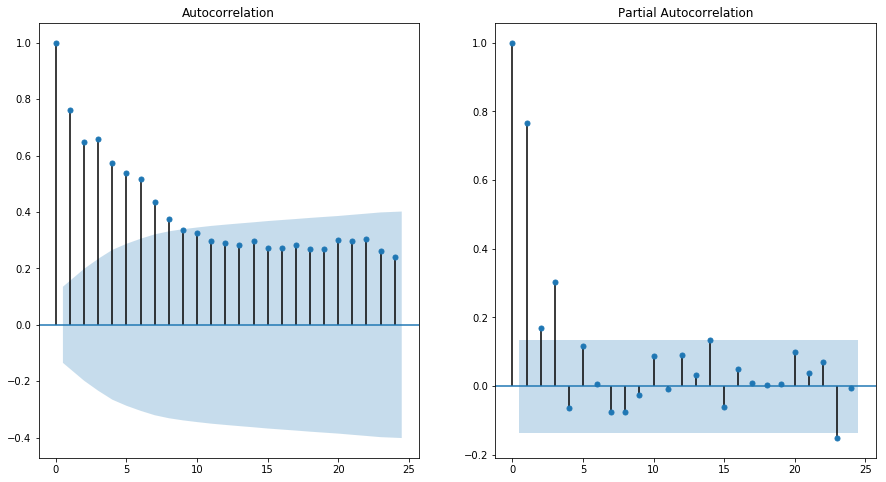

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))

fig = plot_acf(np.asarray(df.inf), ax=axes[0])
fig = plot_pacf(np.asarray(df.inf), ax=axes[1])
fig.show()

- L'autocorrélogramme calcule la corrélation à un instant y aux mesures précédentes (au temps y − 1, y − 2, y − 3, etc.).
- L'autocorrélogramme partiel mesure l'autocorrélation de l'inflation pour un décalage "indépendamment" des autocorrélations pour les décalages inférieurs. 

Les images montrent que la valeur d'inflation de l'année présente dépend de plusieurs valeurs des années précédentes. Donc ce n'est pas une série temporelle stationnée.

# Question 6

Quelle est la différence entre la stationnarité et l'ergodicité ? Pourquoi a-t-on besoin de ces deux conditions. Expliquez le terme "spurious regression".

- La stationarité est un état atteint lorsque ys, ys+1, ys+2 ... ne dépend pas de s. En d'autres termes, chaque période de série se ressemblent. 

- L'ergodicité est le processus par lequel l'on oublie les conditions initiales, et l'autocorrélation d'ordre k tend vers 0 quand k tend vers l'infini.

- Le terme "spurious regression" est pour décrire un pair de données qui ont une même tendance mais ils n'ont pas de vrai relation. Beaucoup de variables économiques ont une tendance positive. Sans modéliser la tendance commune peut conduire à une analyse spurious (faux). Il faudrait faire une correction: y<sub>t</sub> = $\beta$<sub>0</sub> + $\beta$<sub>1</sub>x<sub>t1</sub> + $\beta$<sub>2</sub>x<sub>t2</sub> + $\beta$<sub>3</sub>t + u<sub>t</sub>.


# Question 7

Faire le test Augmented Dickey Fuller pour inf en utilisant le critère AIC pour déterminer le nombre de lags à inclure. Commenter

In [11]:
result = adfuller(df.inf, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('nombre de lag: %f' % result[2])

ADF Statistic: -2.919056
p-value: 0.043177
nombre de lag: 2.000000


Le nombre de lag à inclure est 2.

Le p-value est inférieur à 0.05, donc l'hypothèse nulle (H0) est rejetée. Les données "inf" n'ont pas de racine unitaire et sont stationnaires, et elle ne dépendent pas du temps.

# Question 8

Proposer une modélisation AR(p) de inf, en utilisant tous les outils vus au cours.

On cherche à minimiser le critère Akaike Information Criterion (AIC), pour trouver le meilleur ordre du polynôme autorégressif (p).

In [12]:
aic = []
bic = []
for k in range(1,10) :
    model = ARIMA(df.inf, order=(k,0,0))
    model_fit = model.fit()
    aic.append(model_fit.aic)
    bic.append(model_fit.bic)

/Users/didi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/didi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/didi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/didi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/didi/opt/anaconda3/lib/python3.7/site-packages/statsm

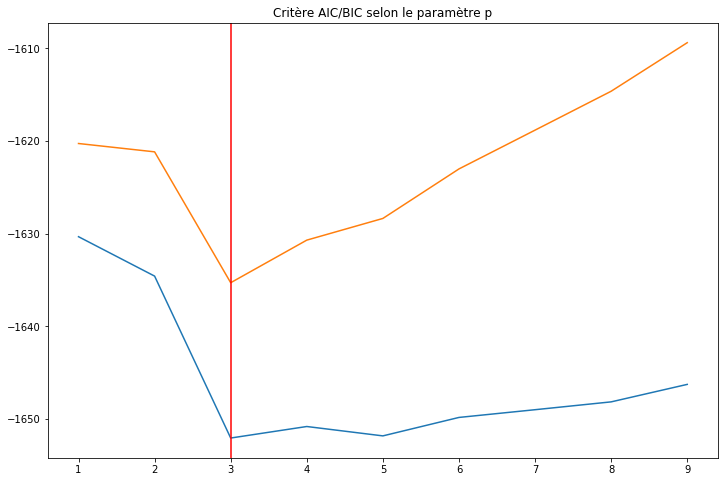

In [13]:
plt.figure(figsize=(12,8))
plt.plot(range(1,10), aic, label="AIC")
plt.plot(range(1,10), bic, label="BIC")
plt.axvline(3, c='red')
plt.title("Critère AIC/BIC selon le paramètre p")
plt.show()

Lorsque p = 3, le critère AIC est minimisé. Donc la modèle AR(3) est la meilleur modèle trouvé.



In [14]:
df.inf_ = df.inf[3:]
df.inf_lag1 = df.inf[:-3]
df.inf_lag2 = df.inf[1:-2]
df.inf_lag3 = df.inf[2:-1]

X = sm.add_constant(np.column_stack((df.inf_lag1, df.inf_lag2, df.inf_lag3)))
Y = df.inf_
results = sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    inf   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     116.0
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           7.36e-44
Time:                        21:24:42   Log-Likelihood:                 819.35
No. Observations:                 208   AIC:                            -1631.
Df Residuals:                     204   BIC:                            -1617.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.001      2.383      0.0

/Users/didi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/Users/didi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/Users/didi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/didi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via 

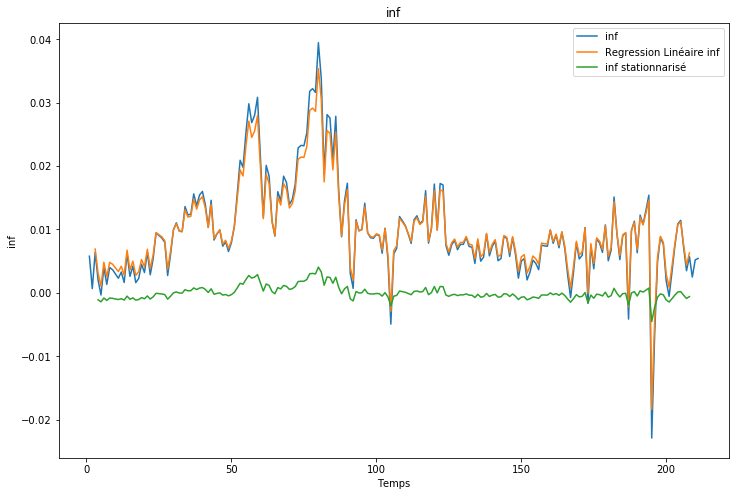

In [15]:
plt.figure(figsize=(12,8))
plt.plot(df.inf, label='inf')

X_plot = np.linspace(0,len(df.CPI),len(df.CPI))
plt.plot(df.inf_lag1*results.params[1] + df.inf_lag2*results.params[2] + df.inf_lag3*results.params[3] + results.params[0], label='Regression Linéaire inf')
plt.plot(df.inf[3:]-(df.inf_lag1*results.params[1] + df.inf_lag2*results.params[2] + df.inf_lag3*results.params[3] + results.params[0]), label='inf stationnarisé')
plt.legend()
plt.title("inf")
plt.xlabel("Temps")
plt.ylabel("inf")
plt.show()

# Question 9

Estimer le modèle de la courbe de Philips qui explique le taux de chômage (Unemp) en fonction du taux d’inflation courant et une constante.

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01214
Date:                Sun, 12 Apr 2020   Prob (F-statistic):              0.912
Time:                        21:24:43   Log-Likelihood:                -400.28
No. Observations:                 211   AIC:                             804.6
Df Residuals:                     209   BIC:                             811.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0708      0.181     33.576      0.0

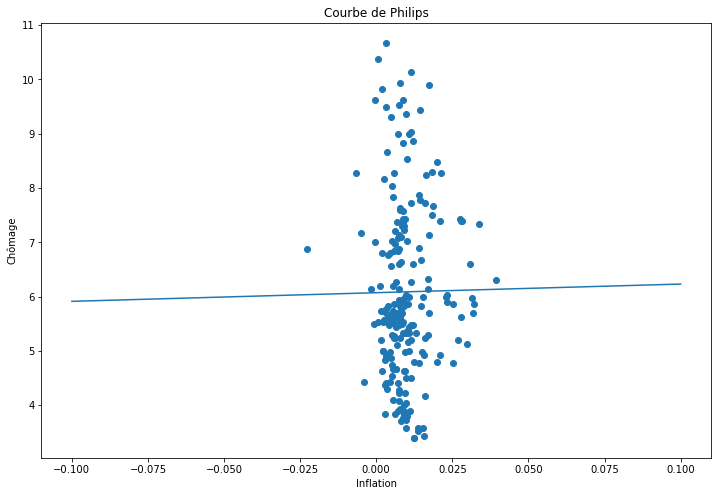

In [16]:
results = sm.OLS(df.Unemp, sm.add_constant(df.inf)).fit()

print(results.summary())

plt.figure(figsize=(12,8))
plt.scatter(df.inf, df.Unemp)
X_plot = np.linspace(-0.1,0.1,100)
plt.plot(X_plot, X_plot*results.params[1] + results.params[0])
plt.title("Courbe de Philips")
plt.xlabel("Inflation")
plt.ylabel("Chômage")
plt.show()

Le coefficient semble indiquer qu'une augmentation de 1% de l'inflation augmente le chômage de 1.59%, et lorsque l'inflation est zéro, le chômage est à 6.0708%. 

# Question 10

Tester l’autocorrélation des erreurs.

Si la courbe de Philips s'adapte bien, la distribution des résidus devraient être aléatoire et n'a pas d'autocorrélation. Donc on va tester l'autocorrélation des résidus pour voir si la courbe de Philips capture tous les information des données. 

In [17]:
pred = results.predict(sm.add_constant(df.inf))
df['res'] = df.Unemp - pred

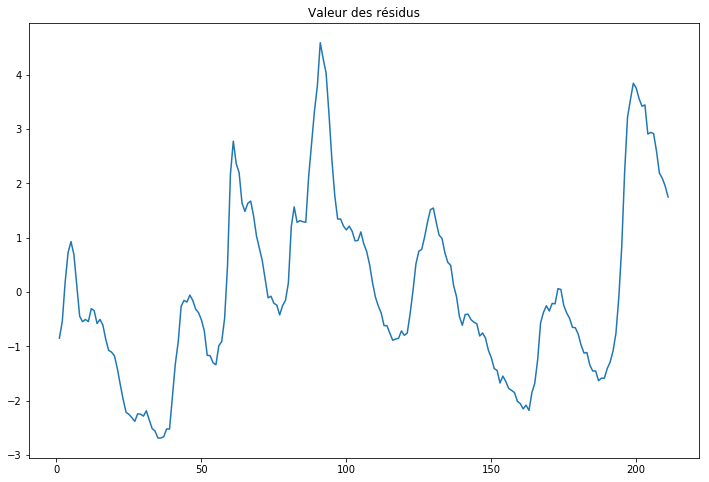

In [18]:
plt.figure(figsize=(12,8))
plt.plot(df.res)
plt.title("Valeur des résidus")
plt.show()

On peut constater que les résidu ne sont pas aléatoires du tout.

Text(0.5,1,'Distribution des résidus')

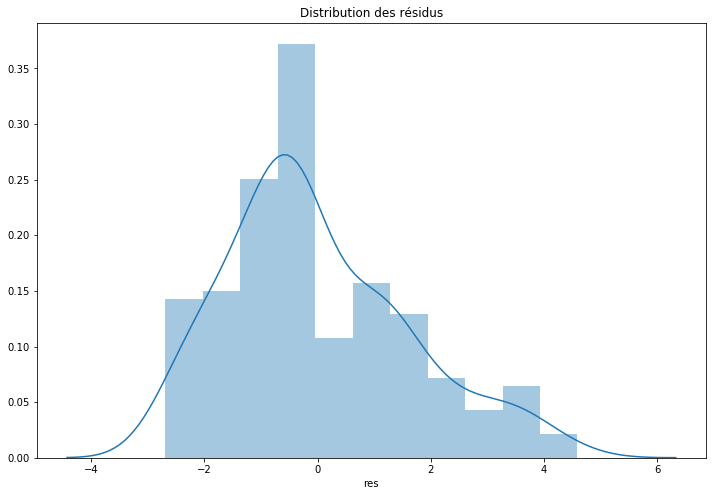

In [19]:
plt.figure(figsize=(12,8))
sns.distplot(df.res)
plt.title("Distribution des résidus")

On peux constater que la distribution de résidu ne suit pas une loi normale, qui va impacter la précision de la modèle. On va voir l'autocorrelation de résidu.

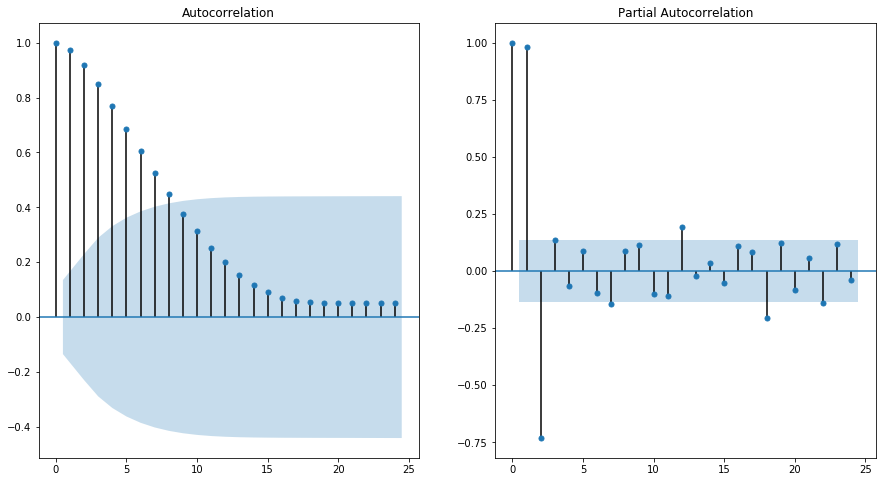

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))

fig = plot_acf(df.res,ax=axes[0])
fig = plot_pacf(df.res,ax=axes[1])

Le graphe de l’autocorrelation indique que le processus est non-stationnaire. Les diagrammes de autocorrelation et autocorrelation partiel indique que c'est un processus AR(2).

# Question 11

Corriger l’autocorrélation des erreurs par la méthode vue en cours.

Par l'autocorrelation partial, on constate qu'il y a 2 coefficients significatifs. Donc la modèle pour l'erreurs est AR(2).

$ y_t = \beta_0 + \beta_1 y_{t-1} + \beta_2 y_{t-2} + u_t $

Et on va vérifierle lag par une recherche de minimisation de AIC.

In [21]:
aic = []
bic = []
for k in range(5):
  model = ARIMA(df.res, order=(k,0,0))
  result = model.fit()
  aic.append(result.aic)
  bic.append(result.bic)

/Users/didi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/didi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/didi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/didi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/didi/opt/anaconda3/lib/python3.7/site-packages/statsm

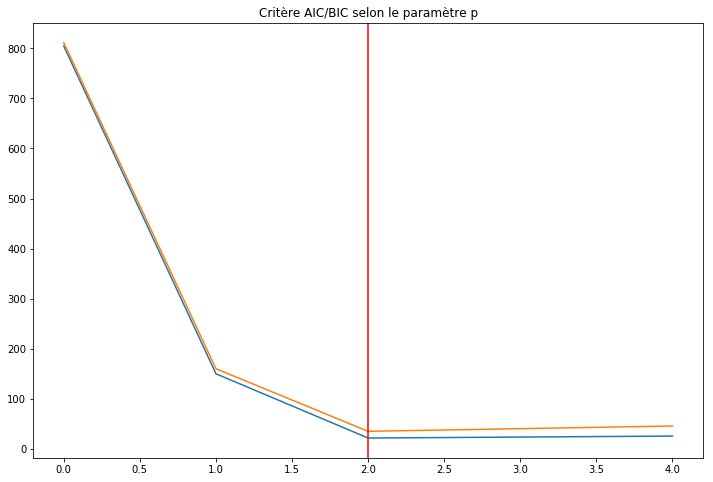

In [22]:
plt.figure(figsize=(12,8))
plt.plot(range(5), aic, label='AIC')
plt.plot(range(5), bic, label='BIC')
plt.axvline(2, c='red')
plt.title("Critère AIC/BIC selon le paramètre p")
plt.show()

In [23]:
y = df.res.values[2:]
X1 = df.res.shift(1)[2:]
X2 = df.res.shift(2)[2:]

X = np.column_stack((X1, X2))
X = sm.add_constant(X)
ols = sm.OLS(y, X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     4293.
Date:                Sun, 12 Apr 2020   Prob (F-statistic):          1.22e-168
Time:                        21:24:44   Log-Likelihood:                -5.0149
No. Observations:                 209   AIC:                             16.03
Df Residuals:                     206   BIC:                             26.06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.017      0.097      0.9

In [24]:
resid = ols.resid

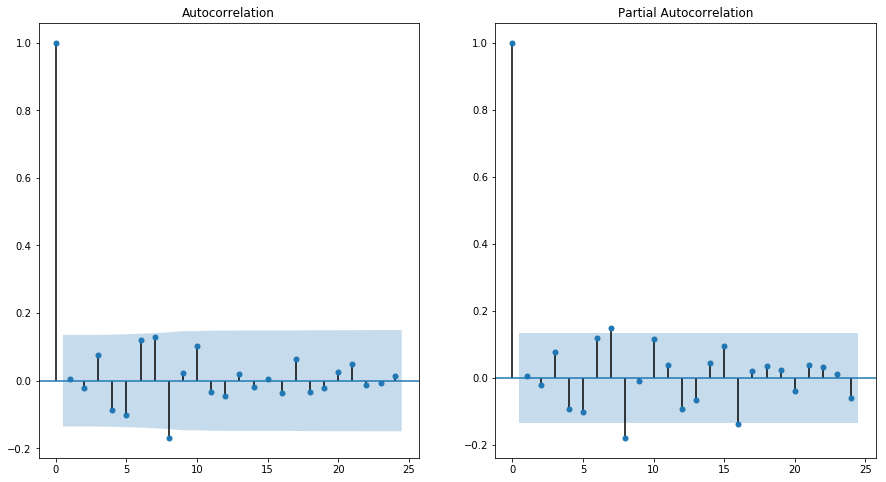

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))

fig = plot_acf(resid, ax=axes[0])
fig = plot_pacf(resid, ax=axes[1])

L'autocorrélation des erreurs est corrigé par la modèle:
 
$ y_t = 1.6454 * y_{t-1} -0.6821 * y_{t-2} + 0.0017 $

On peux voir que le résidu stationnarisé est assez stable comme montré en image ci-dessous:

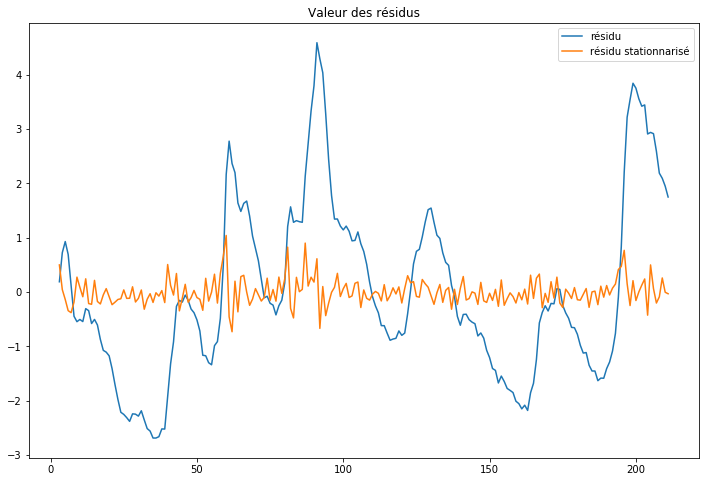

In [26]:
plt.figure(figsize=(12,8))
plt.plot(df.res[2:], label = "résidu")
plt.plot(df.res[2:]-np.sum(ols.params*X, axis = 1), label = "résidu stationnarisé")
plt.legend()
plt.title("Valeur des résidus")
plt.show()

# Question 12

Tester la stabilité de la relation chômage-inflation sur deux sous-périodes de taille identique.

On va d'abord trier le couple inf et Unemp pas l'order croissant, afin de faciliter tracer la courbe pour les deux sous-périodes de taille identique.

In [27]:
df_f = pd.DataFrame(np.column_stack((df.inf, df.Unemp)))

In [28]:
df_f.columns = ['inf', 'Unemp']

In [29]:
df_f = df_f.sort_values(by=['inf'])

In [30]:
# Modèle non-contrainte

X = sm.add_constant(df_f.inf.values)
Y = df_f.Unemp.values
model_0 = sm.OLS(Y, X).fit()

SSR_0 = np.sum(model_0.resid ** 2)
n0,k0 = X.shape
ddl_0 = n0 - k0

print(model_0.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01214
Date:                Sun, 12 Apr 2020   Prob (F-statistic):              0.912
Time:                        21:24:44   Log-Likelihood:                -400.28
No. Observations:                 211   AIC:                             804.6
Df Residuals:                     209   BIC:                             811.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0708      0.181     33.576      0.0

On va prendre sous-période de taille 105.

In [31]:
# Modèle contrainte première moitié

X = sm.add_constant(df_f.inf[:105].values)
Y = df_f.Unemp[:105].values
model_1 = sm.OLS(Y, X).fit()

SSR_1 = np.sum(model_1.resid ** 2)
n1,k1 = X.shape
ddl_1 = n1 - k1

print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.738
Date:                Sun, 12 Apr 2020   Prob (F-statistic):              0.190
Time:                        21:24:44   Log-Likelihood:                -195.44
No. Observations:                 105   AIC:                             394.9
Df Residuals:                     103   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3349      0.234     27.027      0.0

In [32]:
# Modèle non-contrainte deuxième moitié

Y = df_f.Unemp[105:]
X = sm.add_constant(df_f.inf[105:].values)
model_2 = sm.OLS(Y, X).fit()

SSR_2 = np.sum(model_2.resid ** 2)
n2,k2 = X.shape
ddl_2 = n2 - k2

print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.019
Date:                Sun, 12 Apr 2020   Prob (F-statistic):              0.315
Time:                        21:24:44   Log-Likelihood:                -203.29
No. Observations:                 106   AIC:                             410.6
Df Residuals:                     104   BIC:                             415.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7189      0.385     14.845      0.0

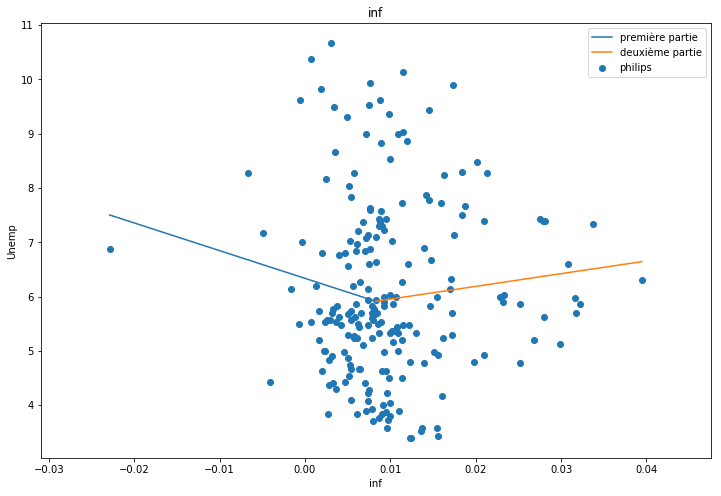

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(df.inf, df.Unemp, label='philips')
X_plot = np.linspace(min(df_f.inf),max(df_f.inf),len(df_f.inf))
plt.plot(X_plot[:105], X_plot[:105]*model_1.params[1] + model_1.params[0], label='première partie')
plt.plot(X_plot[105:], X_plot[105:]*model_2.params[1] + model_2.params[0], label='deuxième partie')
plt.legend()
plt.title("inf")
plt.xlabel("inf")
plt.ylabel("Unemp")
plt.show()

In [34]:
ddl_2

104

In [35]:
# Stat de test
F = (SSR_0 - (SSR_1 + SSR_2))/ (ddl_0 - (ddl_1 + ddl_2)) / ((SSR_1 + SSR_2) / (ddl_1 + ddl_2))
p_val = 1 - f.cdf(F, (ddl_0 - (ddl_1 + ddl_2)), (ddl_1 + ddl_2))
print("F est %s, et la p-value est %s"%(F,p_val))

F est 1.3605559567974996, et la p-value est 0.25880225859841355


On obtient F = 1.36 et p = 0.26, donc on ne rejette pas l’hypothese nulle des coefficients. La relation chômage-inflation sur deux sous-périodes de taille identique est donc stable.

# Question 13

Faites les tests changement de structure de Chow et détecter le point de rupture.

Dans la question précédente, le point de rupture n'est pas reconnu. Dans ce cas là, on peut faire un test QLR. Il s’agit en fait
de la F-statistique maximale du test de Chow sur un certain échantillon de points de rupture :
QLR = maxτ∈{τ0,...,τ1}F(τ ). On va utiliser 15% de trimming revient a prendre τ=0.05T et τ1 = 0.95T.

On va tester le changement de structure de Chow sous l'hypothèse $H_0$:
$\gamma_0 = \gamma_1 = 0$

In [36]:
def chow_struc(date) :
    cons = np.ones(len(df.inf))
    # Modèle non contraint
    Y = df_f.Unemp
    X = sm.add_constant(df_f.inf)
    ols_1 = sm.OLS(Y, X).fit()
  
    SSR_0 = np.sum(ols_1.resid ** 2)
    ddl_0 = len(X) - 2

    # Modèle contraint
    Y = df_f.Unemp[:date]
    X = sm.add_constant(df_f.inf[:date])
    ols_1 = sm.OLS(Y, X).fit()
  
    SSR_1 = np.sum(ols_1.resid ** 2)
    ddl_1 = len(X) - 2
  
    # Modèle non-contraint
    Y = df_f.Unemp[date:]
    X = sm.add_constant(df_f.inf[date:])
    ols_2 = sm.OLS(Y, X).fit()

    SSR_2 = np.sum(ols_2.resid ** 2)
    ddl_2 = len(X) - 2
  
    # Stat de test
    F = (SSR_0 - (SSR_1 + SSR_2))/ (ddl_0 - (ddl_1 + ddl_2)) / ((SSR_1 + SSR_2) / (ddl_1 + ddl_2))
    p_val = 1 - f.cdf(F, (ddl_0 - (ddl_1 + ddl_2)), (ddl_1 + ddl_2))
  
    return F, p_val

In [37]:
chow = []
p_val = []

for date in range(int(0.05*len(df)), int(0.95*len(df))) :
    chow.append(chow_struc(date)[0])
    p_val.append(chow_struc(date)[1])

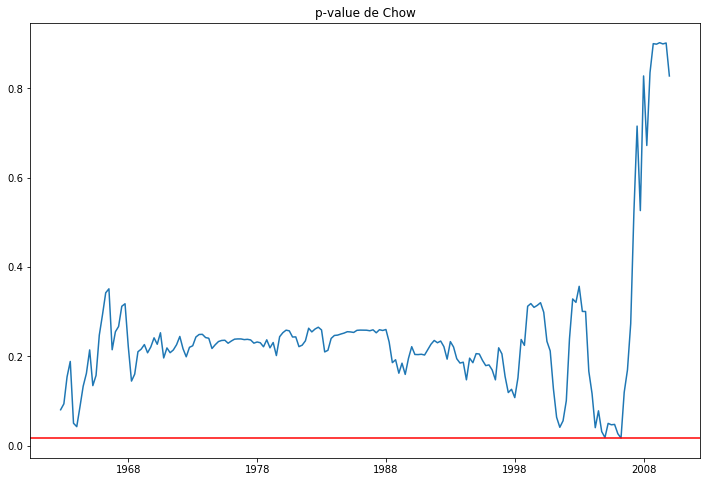

In [38]:
plt.figure(figsize=(12,8))
plt.plot(df.DATE[int(0.05*len(df)): int(0.95*len(df))], p_val)
plt.axhline(0.018, color='red')
plt.title("p-value de Chow")
plt.show()

In [39]:
# Période de rupture
print('La p-value atteint son minimum à une valeur %s au %s'%(min(p_val), df.DATE[int(0.05*len(df)) + np.argmin(p_val)]))

La p-value atteint son minimum à une valeur 0.01746018929843074 au 2006-01-01 00:00:00


Le point de rupture est dû à la récession financiaire depuis 2006.

# Question 14

Estimer la courbe de Philips en supprimant l'inflation courante des variables explicatives mais en ajoutant les délais d’ordre 1, 2, 3 et 4 de l’inflation et du chômage. Faire le test de Granger de non causalité de l’inflation sur le chômage. Donnez la p-valeur.

Le test de Granger de non causalité de l’inflation sur le chômage considère $\beta_1 = \beta_2 = \beta_3 = \beta_4 = 0$

In [40]:
# modele non contraint
X = np.column_stack((df.inf.shift(1)[4:], df.inf.shift(2)[4:], df.inf.shift(3)[4:], df.inf.shift(4)[4:],
                     df.Unemp.shift(1)[4:], df.Unemp.shift(2)[4:], df.Unemp.shift(3)[4:], df.Unemp.shift(4)[4:],))
X = sm.add_constant(X) # adding a constant
Y = df.Unemp[4:]
model = sm.OLS(Y, X).fit()
print(model.summary())
SSR_0 = np.sum(model.resid**2)
ddl_0 = len(Y) - 9

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1145.
Date:                Sun, 12 Apr 2020   Prob (F-statistic):          2.80e-161
Time:                        21:24:49   Log-Likelihood:                 4.6497
No. Observations:                 207   AIC:                             8.701
Df Residuals:                     198   BIC:                             38.70
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1457      0.072      2.014      0.0

In [41]:
# modele contraint avec inflation
X = np.column_stack((df.inf.shift(1)[4:], df.inf.shift(2)[4:], df.inf.shift(3)[4:], df.inf.shift(4)[4:]))
X = sm.add_constant(X) # adding a constant
Y = df.Unemp[4:]
model_inf = sm.OLS(Y, X).fit()
SSR_inf = np.sum(model_inf.resid ** 2)
ddl_inf = len(Y) - 1 - 1 - 1 - 1 - 1

# # modele contraint avec Unemp
X = np.column_stack((df.Unemp.shift(1)[4:], df.Unemp.shift(2)[4:], df.Unemp.shift(3)[4:], df.Unemp.shift(4)[4:]))
X = sm.add_constant(X) # adding a constant
Y = df.Unemp[4:]
model_emp = sm.OLS(Y, X).fit()
SSR_emp = np.sum(model_emp.resid ** 2)
ddl_emp = len(Y) - 1 - 1 - 1 - 1 - 1

F = ((SSR_emp - SSR_0)/ (ddl_emp - ddl_0)) / (SSR_0 / ddl_0) 
p_val = 1 - f.cdf(F, (ddl_emp - ddl_0), ddl_0)

In [42]:
print("F est %s, et la p-value est %s."%(F, p_val))

F est 3.7966991982053075, et la p-value est 0.005351957807937291.


La p-values est inférieur au seuil de 5%. Nous rejetons donc pas l'hypothèse nulle que aucun des délais d'ordre 1,2,3,4 sur inflation ne cause pas de chômage.

La causalité de Granger signifie que les termes d'inflations ont un effet statistiquement significatif.



# Question 15

Représentez graphiquement les délais distribués et commentez. Calculer l’impact à long de terme de l’inflation sur le chômage.

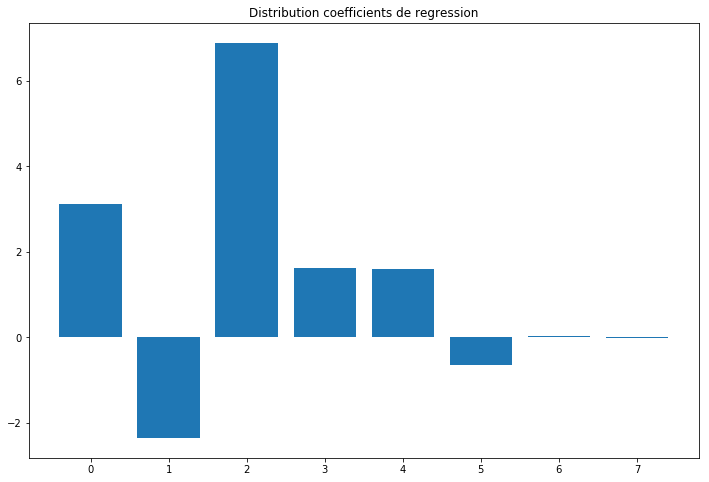

In [43]:
plt.figure(figsize=(12,8))
plt.bar(range(8), model.params[1:])
plt.title("Distribution coefficients de regression")
plt.show()

On peut constater que, pour la modèle en ajoutant les délais d’ordre 1, 2, 3 et 4 de l’inflation et du chômage, les deux dernier coefficients sont presque zéros. Et le délai distribué peut petre exprimé comme :
$$ y_t = \alpha_0 + \delta_0 z_t + \delta_1 z_{t-1} + \delta_2 z_{t-2} + \delta_3 z_{t-3} + \delta_4 z_{t-4} + \delta_5 y_{t-1} + \delta_6 y_{t-2} + u_t $$

Calculer l’impact à long de terme de l’inflation sur le chômage.
Le délai distribué peut petre exprimé comme :
$$ y_t = \alpha_0 + \delta_0 z_t + \delta_1 z_{t-1} + \delta_2 z_{t-2} + \delta_3 z_{t-3} + \delta_4 z_{t-4} + u_t $$

In [44]:
print(model_inf.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     5.040
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           0.000683
Time:                        21:24:49   Log-Likelihood:                -384.53
No. Observations:                 207   AIC:                             779.1
Df Residuals:                     202   BIC:                             795.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6825      0.192     29.534      0.0

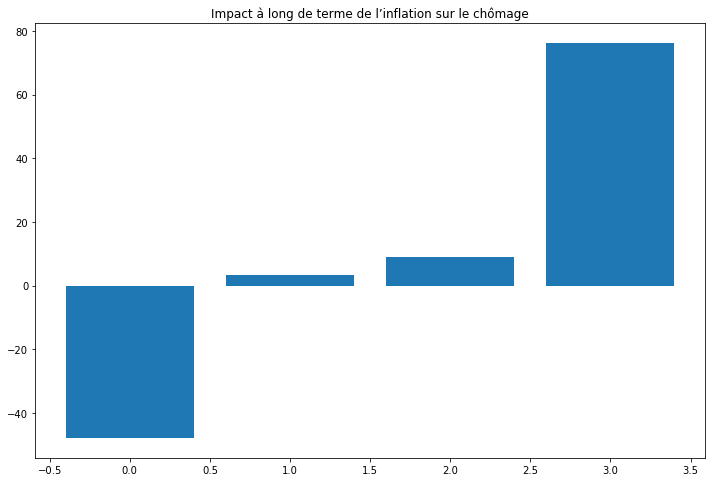

In [45]:
plt.figure(figsize=(12,8))
plt.bar(range(4), model_inf.params[1:])
plt.title("Impact à long de terme de l’inflation sur le chômage")
plt.show()